# SD212: Graph mining
## Lab 5: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
# if you get any error, please update scikit-network!
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainHierarchy, BiLouvainHierarchy, Paris, BiParis, cut_straight
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_dendrogram

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [85]:
graph = karate_club(True)

In [86]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

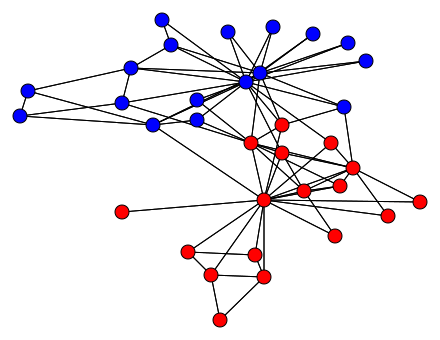

In [87]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 2?

In [88]:
louvain = LouvainHierarchy()

In [89]:
dendrogram = louvain.fit_transform(adjacency)

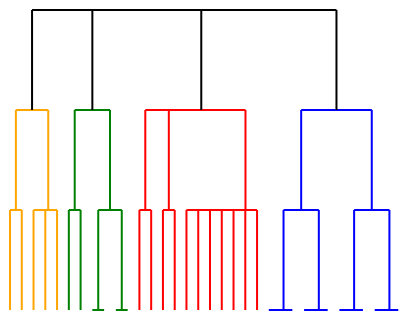

In [90]:
image = svg_dendrogram(dendrogram)
SVG(image)

At depth 2, there are 9 clusters.

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. How many nodes are misclassified compared to the ground truth?
* Display the graph with the top-4 clusters and the corresponding aggregate dendrogram.

**Hint:** Check the parameters of the function ``cut_straight``.

In [91]:
paris = Paris()

In [92]:
dendrogram = paris.fit_transform(adjacency)

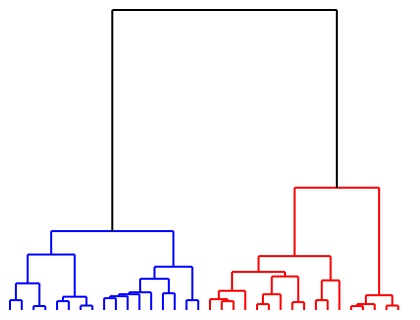

In [93]:
image = svg_dendrogram(dendrogram)
SVG(image)

In [94]:
labels = cut_straight(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


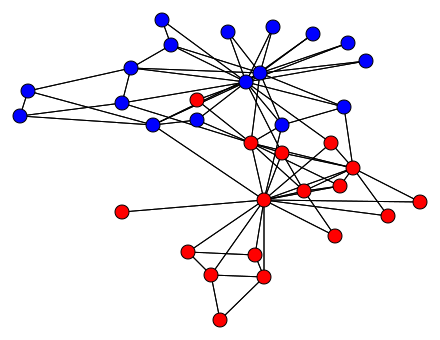

In [95]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

For 2 clusters, there are 2 misclassified nodes.

In [96]:
n_clusters = 4
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters, return_dendrogram=True)
_, counts = np.unique(labels, return_counts=True)

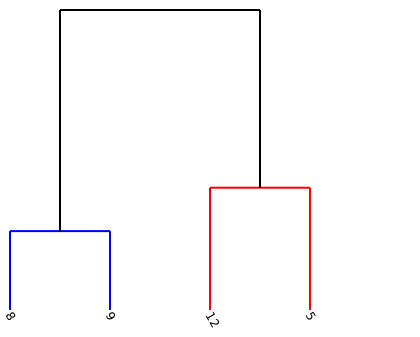

In [99]:
image = svg_dendrogram(dendrogram_aggregate,names=counts)
SVG(image)

## Openflights


In [52]:
graph = openflights

In [53]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

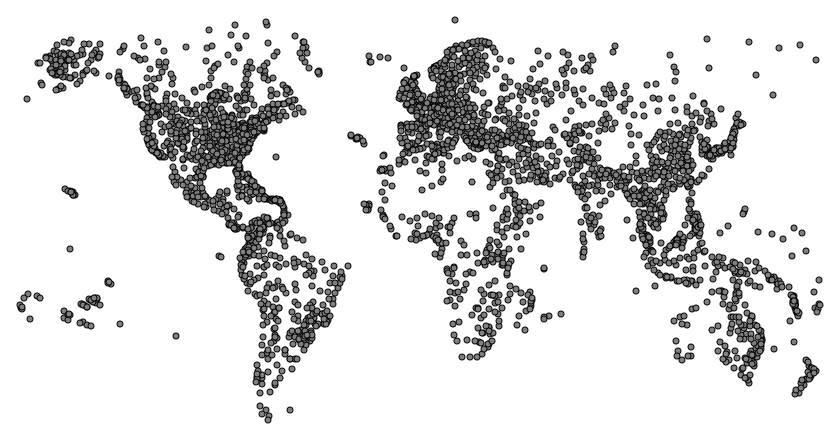

In [54]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-50 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>**Hint:** Use the parameters ``rotate``, ``n_clusters`` and ``scale`` for better visualization of the dendrogram.

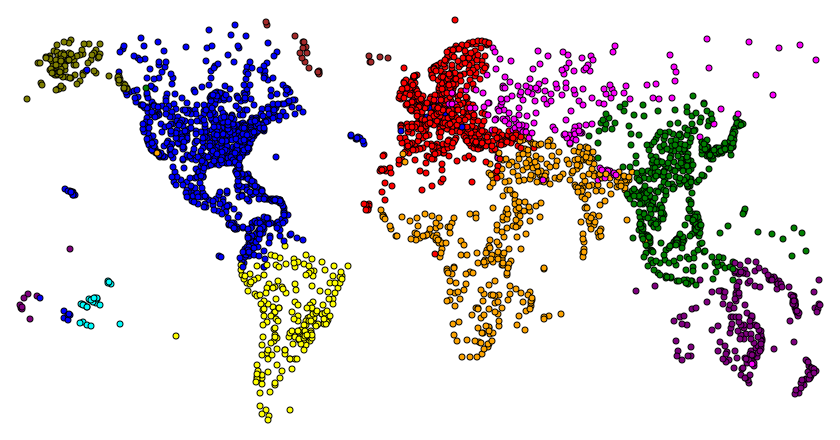

In [55]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
n_clusters = 10
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters, return_dendrogram=True)
image = svg_graph(adjacency, position, width=800, height=400, labels=labels, node_size=3, display_edges=False)
SVG(image)

In [56]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
n_clusters = 50
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters, return_dendrogram=True)

In [57]:
degree = adjacency.dot(np.ones(adjacency.shape[0]))
airports = [0 for i in range(n_clusters)]
maximum = [0 for i in range(n_clusters)]
for i in range(len(degree)):
    if (maximum[labels[i]] < degree[i]):
        maximum[labels[i]] = degree[i]
        airports[labels[i]] = i
print(airports)

[1615, 1986, 1618, 1782, 999, 1688, 1726, 1171, 379, 1773, 124, 1579, 1833, 1295, 1857, 238, 1890, 1914, 487, 112, 623, 97, 313, 286, 982, 762, 1097, 366, 699, 193, 1842, 750, 919, 251, 573, 1858, 2019, 253, 7, 622, 194, 192, 572, 564, 240, 1632, 183, 189, 669, 280]


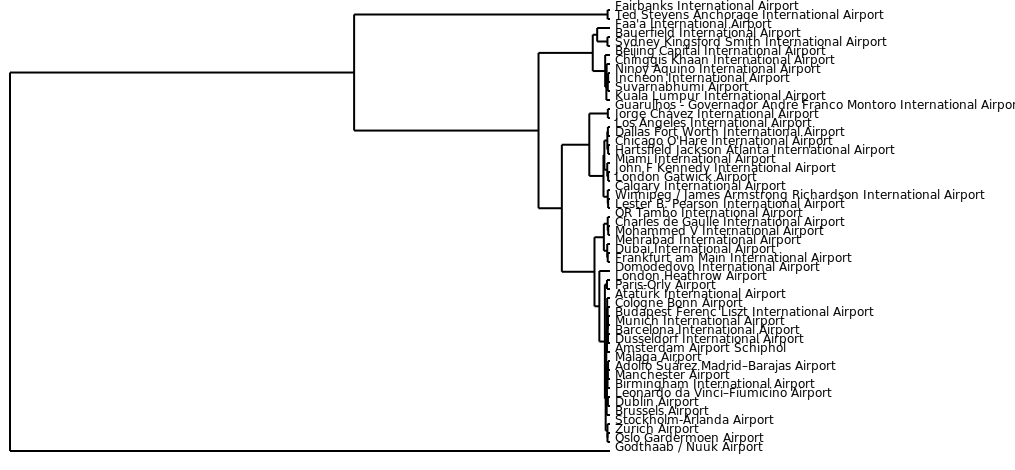

In [58]:
image = svg_dendrogram(dendrogram_aggregate, rotate=True, n_clusters=n_clusters, names=names[airports], scale=1.5)
SVG(image)

## 2. Digraphs

## Wikipedia Vitals

In [123]:
graph = wikivitals

In [124]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-25 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-25 clusters, with the name of the top article of each cluster.

**Hint:** Use Personalized PageRank to get the top nodes of a cluster.

In [125]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
image = svg_dendrogram(dendrogram)
SVG(image)

In [126]:
n_clusters = 25
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters, return_dendrogram=True)

In [127]:
pagerank = PageRank()
top_pages = []
for label in np.unique(labels):
    cluster = np.where(labels == label)[0]
    seeds = {node: 1 for node in cluster}
    scores = pagerank.fit_transform(adjacency, seeds)
    top_nodes = cluster[top_k(scores[cluster], 5)]
    print(names[top_nodes], len(cluster))
    top_pages.append(top_nodes[0])

['Taxonomy (biology)' 'Animal' 'Plant' 'Cretaceous' 'Chordate'] 1190
['The New York Times' 'Time (magazine)' 'Jazz' 'Romanticism'
 'Igor Stravinsky'] 918
['Earth' 'Kelvin' 'Physics' 'Sun' 'Electron'] 709
['Mathematics' 'Real number' 'Function (mathematics)' 'Complex number'
 'Integer'] 687
['Psychology' 'Pregnancy' 'Immune system' 'Infection' 'Nervous system'] 658
['Plato' 'Karl Marx' 'Age of Enlightenment' 'Law' 'Socialism'] 585
['Australia' 'Indonesia' 'Europe' 'Philippines' 'New Zealand'] 529
['Roman Empire' 'Byzantine Empire' 'Renaissance' 'Egypt' 'Ancient Rome'] 465
['Islam' 'Iran' 'Iraq' 'Persian language' 'Syria'] 410
['Russia' 'Germany' 'Italy' 'Ottoman Empire' 'Ukraine'] 390
['Water' 'Industrial Revolution' 'Precipitation' 'Petroleum'
 'Global warming'] 334
['China' 'Chinese language' 'Japan' 'Ming dynasty' 'Beijing'] 313
['Spain' 'Brazil' 'Mexico' 'Spanish language' 'Argentina'] 306
['World War II' 'Soviet Union' 'World War I' 'Cold War' 'Nazi Germany'] 301
['Oxygen' 'Hydroge

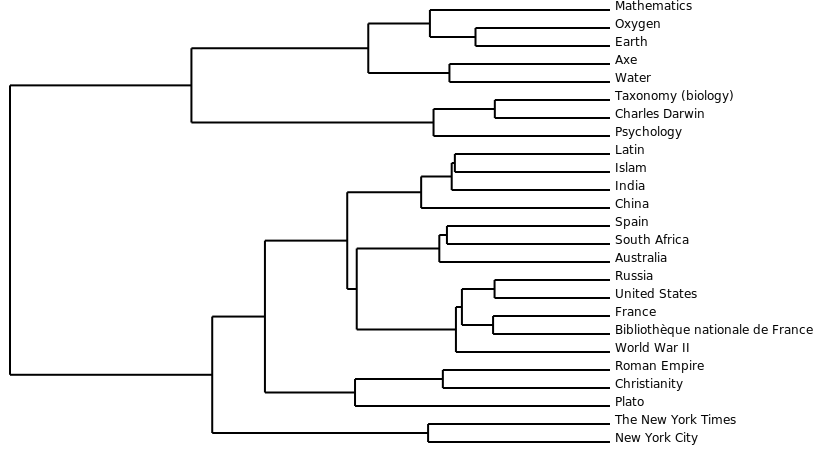

In [128]:
image = svg_dendrogram(dendrogram_aggregate, rotate=True, n_clusters=n_clusters, names=names[top_pages], scale=1.5)
SVG(image)

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [119]:
def get_cluster_nested(dendrogram: np.ndarray, node: int): 
    '''Get nested clusters of a node.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes (see the example below). 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    cluster_nested = [[node]]
    cluster_index = node
    
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed
        if (i==cluster_index):
            cluster_nested.append(cluster[j])
            cluster_index = n + t
        elif (j==cluster_index):
            cluster_nested.append(cluster[i])
            cluster_index = n + t
        cluster[n + t] = cluster.pop(i) + cluster.pop(j)
    
    return cluster_nested

In [121]:
node = 10000

In [122]:
names[node]

'Riverboat'

In [129]:
cluster_nested = get_cluster_nested(dendrogram, node)

**Depth = len(cluster_nested) - 1** 

In [131]:
len(cluster_nested)

15

In [132]:
cluster = []
for cluster_add in cluster_nested:
    cluster += cluster_add
    seeds = {node : 1 for node in cluster}
    scores = pagerank.fit_transform(adjacency, seeds)
    top_nodes = np.array(cluster)[top_k(scores[cluster], 5)]
    print(names[top_nodes], len(cluster))

['Riverboat'] 1
['Riverboat' 'Yukon River'] 2
['Riverboat' 'Fishing vessel' 'Barge' 'Tanker (ship)' 'Cargo ship'] 9
['Ferry' 'Riverboat' 'Barge' 'Fishing vessel' 'Tanker (ship)'] 12
['Ferry' 'Riverboat' 'Barge' 'Fishing vessel' 'Tanker (ship)'] 13
['Ferry' 'Submarine' 'Barge' 'Cargo ship' 'Riverboat'] 27
['Internal combustion engine' 'Diesel engine' 'Jet engine'
 'Fighter aircraft' 'Aircraft'] 96
['Internal combustion engine' 'Diesel engine' 'Rail transport'
 'Jet engine' 'Steam engine'] 132
['Internal combustion engine' 'Diesel engine' 'Rail transport'
 'Industrial Revolution' 'Steam engine'] 169
['Internal combustion engine' 'Industrial Revolution' 'Diesel engine'
 'Rail transport' 'Steam engine'] 199
['Water' 'Industrial Revolution' 'Precipitation' 'Petroleum'
 'Global warming'] 334
['Water' 'Industrial Revolution' 'Precipitation' 'Neolithic' 'Irrigation'] 586
['Mathematics' 'Physics' 'Oxygen' 'Hydrogen' 'Earth'] 2276
['Taxonomy (biology)' 'Animal' 'Oxygen' 'Mathematics'
 'Encyclopæ

## 3. Bigraphs

## Cinema

In [133]:
graph = cinema

In [134]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Get the hierarchy of actors and the hierarchy of movies by the Paris algorithm. 
* Give the size and top-3 movies of each of the top-20 clusters of movies.
* Give the size and top-3 actors of each of the top-20 clusters of actors.
* Give the size and top-3 actors of each nested cluster of **Catherine Deneuve**. 

**Hint:** Use Personalized BiPageRank to get the top nodes of a cluster.

In [135]:
biparis = BiParis()

In [136]:
biparis.fit(biadjacency)

BiParis(weights='degree', reorder=True)

In [137]:
dendrogram_row = biparis.dendrogram_row_
dendrogram_col = biparis.dendrogram_col_

In [138]:
label_row = cut_straight(dendrogram_row, 20)
label_col = cut_straight(dendrogram_col, 20)

In [139]:
bipagerank = BiPageRank()

In [142]:
for label in np.unique(label_row):
    cluster_row = np.where(label_row == label)[0]
    seeds_row = {node : 1 for node in cluster_row}
    bipagerank.fit(biadjacency, seeds_row)
    scores_row = bipagerank.scores_row_
    top_row = cluster_row[top_k(scores_row[cluster_row],3)]
    print(movies[top_row], len(cluster_row))

['The Walking Dead (TV series)' 'House of Cards (U.S. TV series)'
 'Arrow (TV series)'] 23926
['Paramount on Parade' 'Ziegfeld Follies' 'The Hollywood Revue of 1929'] 22042
['Suyamvaram' 'Kerala Cafe' 'Paalayam'] 11027
['Many Kisses Later' 'Kaamelott' 'Un village français'] 10353
['Mahabharat (2016 film)' 'Rajkahini' 'Immaan Dharam'] 7007
['The Banquet (1991 film)' 'Lucky Stars' 'Seven Samurai'] 4986
['Tatort' 'The Kingdom (miniseries)' 'Samson & Sally'] 3553
['La gran familia' 'Las chicas del cable' 'Hasta que el dinero nos separe'] 2599
['24/7 in Love' 'Gimik' 'Ang Tanging Ina'] 592
['fr/Maktoub (série télévisée)' 'The BabyDoll Night'
 'The Auntie from Chicago'] 339
['After Porn Ends' 'Not Married with Children XXX' 'Anikka'] 332
['Páginas da Vida' 'Esperança (telenovela)' 'Insensato Coração'] 292
['Istanbul Tales' 'Avrupa Yakası (TV series)' "Mrs. Salkım's Diamonds"] 291
['Mille Soya' 'Thank You Berty' 'Hai Master'] 284
['Weekend Getaway' "Okafor's Law" "Heaven's Hell"] 203
['Dayere

In [149]:
for label in np.unique(label_col):
    cluster_col = np.where(label_col == label)[0]
    seeds_col = {node : 1 for node in cluster_col}
    bipagerank.fit(biadjacency, seeds_col=seeds_col)
    scores_col = bipagerank.scores_col_
    top_col = cluster_col[top_k(scores_col[cluster_col],3)]
    print(actors[top_col], len(cluster_col))

['Eric Roberts' 'Danny Trejo' 'Donald Sutherland'] 16927
['Moe Howard' 'Larry Fine' 'Oliver Hardy'] 8147
['Louis de Funès' 'Gérard Depardieu' 'Totò'] 4879
['Andy Lau' 'Simon Yam' 'Eric Tsang'] 3321
['Edvard Persson' 'Yevgeny Leonov' 'Mikael Persbrandt'] 2594
['Mithun Chakraborty' 'Naseeruddin Shah' 'Dharmendra'] 2437
['Mammootty' 'Jagathy Sreekumar' 'Prem Nazir'] 2270
['Sara García' 'Gaspar Henaine' 'Federico Luppi'] 1633
['Nora Aunor' 'Eugene Domingo' 'Eddie Garcia'] 554
['Faten Hamama' 'Dinos Iliopoulos' 'Hend Sabry'] 333
['Glória Pires' 'José Wilker' 'Selton Mello'] 307
['Evan Stone' 'Beverly Lynne' 'Voodoo'] 264
['Şener Şen' 'Cüneyt Arkın' 'Tarık Akan'] 245
['Nse Ikpe-Etim' 'Majid Michel' 'Ramsey Nouah'] 203
['Parviz Parastui' 'Ezzatolah Entezami' 'Merila Zarei'] 187
['Reza Rahadian' 'Laudya Cynthia Bella' 'Christine Hakim'] 121
['Dilhani Ekanayake' 'Mahendra Perera' 'Sanath Gunathilake'] 89
['Dayahang Rai' 'Aaryan Sigdel' 'Saugat Malla'] 63
['Bala Hijam' 'Gurumayum Bonny' 'Leishan

In [150]:
deneuve = 2173

In [151]:
actors[deneuve]

'Catherine Deneuve'

In [152]:
cluster_nested = get_cluster_nested(dendrogram_col, deneuve)

In [155]:
cluster = []
for cluster_add in cluster_nested:
    cluster += cluster_add
    seeds = {node : 1 for node in cluster}
    bipagerank.fit(biadjacency, seeds_col=seeds)
    scores = bipagerank.scores_col_
    top_nodes = np.array(cluster)[top_k(scores[cluster], 3)]
    print(actors[top_nodes], len(cluster))

['Catherine Deneuve'] 1
['Michel Piccoli' 'Catherine Deneuve'] 2
['François Sagat' 'Chiara Mastroianni' 'Catherine Deneuve'] 7
['Heinz Weiss' 'François Sagat' 'Hans Peter Hallwachs'] 19
['Raffaëla Anderson' 'Anthony Delon' 'Heinz Weiss'] 44
['Raffaëla Anderson' 'Anthony Delon' 'Heinz Weiss'] 60
['Gérard Depardieu' 'Isabelle Huppert' 'Ingrid Chauvin'] 673
['Gérard Depardieu' 'Isabelle Huppert' 'Catherine Jacob'] 939
['Gérard Depardieu' 'Isabelle Huppert' 'Catherine Jacob'] 1161
['Gérard Depardieu' 'Isabelle Huppert' 'Catherine Jacob'] 1410
['Louis de Funès' 'Gérard Depardieu' 'Totò'] 3497
['Louis de Funès' 'Gérard Depardieu' 'Totò'] 4879
['Louis de Funès' 'Gérard Depardieu' 'Edvard Persson'] 7473
['Louis de Funès' 'Gérard Depardieu' 'Sara García'] 9106
['Moe Howard' 'Larry Fine' 'Christopher Lee'] 34444
['Moe Howard' 'Larry Fine' 'Christopher Lee'] 34647
['Moe Howard' 'Larry Fine' 'Christopher Lee'] 34954
['Moe Howard' 'Larry Fine' 'Christopher Lee'] 35376
['Moe Howard' 'Larry Fine' 'Ch